In [1]:
from astropy.table import Table
from dendrocat import RadioSource
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
import importlib
from astropy.wcs import WCS
from scipy import interpolate
import pandas as pd
import sympy as syp
from astropy import units as u
import radio_beam
from astropy.table import Table
from radio_beam import Beam
from astropy import coordinates
from astropy import wcs
from astropy.nddata.utils import Cutout2D
from dendrocat.aperture import Ellipse
from astropy.io import ascii


W51 = '/orange/adamginsburg/w51/TaehwaYoo/'
W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'

#---------- high res B6 (before conv) ------------
w51e2_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e2_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e2_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e2_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural = W51cont+'W51n_cont_bignatural.image.fits'

#---------- high res B3 (before conv) ------------

W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'

w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b3_tt1 = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51n_b3_alpha = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51conv = '/orange/adamginsburg/w51/TaehwaYoo/convolved_new/'
w51n_b6_conv = w51conv + 'w51n_cont_bigbriggs.image.convB3_briggs.fits'

w51e2_b3_tt0 = W51b3+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51e2_b3_tt1 = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51e2_b3_alpha = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51e2_b6_conv = w51conv + 'w51e2_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B6_conv.fits'
w51e_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B3_conv.fits'


w51n_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B3_conv.fits'

w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'

w51n_b6_conv_briggs = w51conv + 'w51n_briggs_B6_conv.fits'
w51n_b6_conv_robust0 = w51conv + 'w51n_robust0_B6_conv.fits'
w51n_b6_conv_superuniform = w51conv + 'w51n_superuniform_B6_conv.fits'




#catalogdir = '/Users/dbahck37/w51data/alma_imf/catalog/getsf-native/'
catalogdir = '/orange/adamginsburg/ALMA_IMF/catalogs/getsf-smoothed/'
cat_w51e = catalogdir + 'W51-E-getsf.cat'
cat_w51n = catalogdir + 'W51-IRS2-getsf.cat'


w51n_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'
w51e_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'

#---------- local direc  ------------

"""

w51n_b3_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51n_b6_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'



w51e_b3_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'


w51n_b6_conv_briggs = '/Users/dbahck37/w51data/convolved_new/w51n_briggs_B6_conv.fits'
w51n_b3_tt0 = '/Users/dbahck37/w51data/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

w51e_b3_tt0 = '/Users/dbahck37/W51data/w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

w51e_b6_conv_briggs ='/Users/dbahck37/W51data/convolved_new/w51e_briggs_B6_conv.fits'
"""







"\n\nw51n_b3_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'\nw51n_b6_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'\n\n\n\nw51e_b3_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'\nw51e_b6_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'\n\n\nw51n_b6_conv_briggs = '/Users/dbahck37/w51data/convolved_new/w51n_briggs_B6_conv.fits'\nw51n_b3_tt0 = '/Users/dbahck37/w51data/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'\n\nw51e_b3_tt0 = '/Users/dbahck37/W51data/w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'\n\nw51e_b6_conv_b

In [2]:
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['axes.titlesize']=20
catdata_w51n = ascii.read(cat_w51n,data_start=0,format='commented_header', header_start=120,  comment="!")
sky_ra = catdata_w51n['WCS_ACOOR']
sky_dec = catdata_w51n['WCS_DCOOR']
pix_x = catdata_w51n['XCO_P']
pix_y = catdata_w51n['YCO_P']

afwhm_b6 = catdata_w51n['AFWHM02']
bfwhm_b6 = catdata_w51n['BFWHM02']

asize_b6 = catdata_w51n['ASIZE02']
bsize_b6 = catdata_w51n['BSIZE02']

theta_b6 = catdata_w51n['THETA02']

afwhm_b3 = catdata_w51n['AFWHM03']
bfwhm_b3 = catdata_w51n['BFWHM03']

asize_b3 = catdata_w51n['ASIZE03']
bsize_b3 = catdata_w51n['BSIZE03']

theta_b3 = catdata_w51n['THETA03']

no = catdata_w51n['NO']

rec_ind_b3 = np.where((np.abs(catdata_w51n['GOODM03'])>1)&
                   (np.abs(catdata_w51n['SIGNM03'])>1)&
                   (catdata_w51n['FXP_BST03']/catdata_w51n['FXP_ERR03']>2)&
                   (catdata_w51n['FXT_BST03']/catdata_w51n['FXT_ERR03']>2)&
                   (catdata_w51n['AFWHM03']/catdata_w51n['BFWHM03']<2)&
                   (catdata_w51n['FOOA03']/catdata_w51n['AFWHM03']>1.15))[0]

rec_ind_b6 = np.where((np.abs(catdata_w51n['GOODM02'])>1)&
                   (np.abs(catdata_w51n['SIGNM02'])>1)&
                   (catdata_w51n['FXP_BST02']/catdata_w51n['FXP_ERR02']>2)&
                   (catdata_w51n['FXT_BST02']/catdata_w51n['FXT_ERR02']>2)&
                   (catdata_w51n['AFWHM02']/catdata_w51n['BFWHM02']<2)&
                   (catdata_w51n['FOOA02']/catdata_w51n['AFWHM02']>1.15))[0]
print(rec_ind_b3)
print(rec_ind_b6)
skypos = np.vstack((sky_ra,sky_dec)).T


manualindex =[1,6,3,5,8,68]
manualindex =[0,5,2,4,7,67]
catalogdir = '/orange/adamginsburg/ALMA_IMF/catalogs/getsf-smoothed/'
cat_w51e = catalogdir + 'W51-E-getsf.cat'
cat_w51n = catalogdir + 'W51-IRS2-getsf.cat'


[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 16 17 18 20 28 29 31 35 55 57
 82]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  83  84  85  86  87  88  89  90  91  93  94  96  97
  98  99 100 101 103 104 105 106 107 112 113 116 118]


### w51n (highres associated-sources only)

[[8253.         7015.        ]
 [8100.99999998 7129.        ]
 [7028.00000001 7167.00000001]
 [7628.00000001 7226.        ]
 [7826.00000001 7273.        ]
 [7763.99999999 7277.99999999]
 [7490.99999999 7286.        ]
 [7343.00000001 7299.        ]
 [7603.99999998 7294.        ]
 [7146.00000001 7318.99999999]
 [7185.00000002 7302.99999999]
 [7551.99999999 7306.99999999]
 [7082.99999999 7350.99999999]
 [7782.00000001 7330.99999999]
 [7183.00000001 7333.        ]
 [7046.99999998 7341.99999999]
 [7279.99999999 7350.99999999]
 [7047.00000001 7358.        ]
 [7008.00000002 7361.        ]
 [7272.         7367.        ]
 [7255.99999999 7409.        ]
 [7115.         7310.99999999]]
2 7347.714058345279 7303.508605958352 103.155556115106 94.3698418293897 114.18 1
3 3382.8849196269616 6065.328560551815 97.8698418293905 94.55555611510403 100.25 0
6 7259.791329436012 7371.7542787048105 111.76984182939368 104.81269897224925 31.599999999999994 3
7 7773.686273628713 7289.469769055718 122.9841275436819

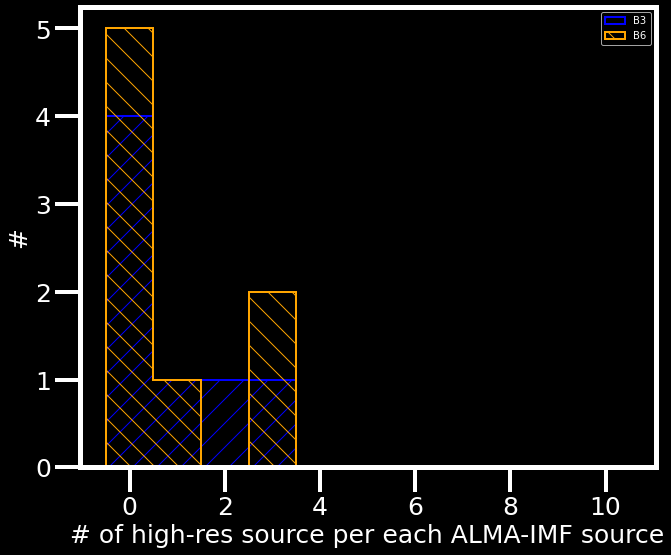

In [22]:
from functools import reduce
def count_points_in_ellipse(xcen,ycen,major,minor,pa,xpos,ypos):
    # caclulate foci positions 
    # must be full major, minor not semi major, minor
    fodx = np.cos(pa)*np.sqrt((major/2)**2-(minor/2)**2)
    fody = np.sin(pa)*np.sqrt((major/2)**2-(minor/2)**2)
    
    fox1 = xcen + fodx
    foy1 = ycen + fody
    
    fox2 = xcen - fodx
    foy2 = ycen - fody
    
    dist1 = np.sqrt((xpos-fox1)**2+(ypos-foy1)**2)
    dist2 = np.sqrt((xpos-fox2)**2+(ypos-foy2)**2)
    
    isinside = np.where(dist1+dist2<major)[0]
    
    return len(isinside), list(isinside)


def multiplicity(ax,hdrNB,catdatadir,xysource,isb3=True,beam=None,use_criteria=True, 
                          label=None,color='cyan',lw=2,aperture='fwhm+beam',hatch='/',histcolor='b',
                 legendlabel=None,limitarea=None, return_nonzero_ind=False, maxrad=1e3,alpha=1):
    catdata = ascii.read(catdatadir,data_start=0,format='commented_header', header_start=120,  comment="!")
    sky_ra = catdata['WCS_ACOOR']
    sky_dec = catdata['WCS_DCOOR']
    no = catdata['NO']
    if isb3:
        bandlabel = '03'
    else:
        bandlabel = '02'
    fooa = catdata['FOOA%s'%bandlabel]
    foob = catdata['FOOB%s'%bandlabel]
    theta = catdata['THETA%s'%bandlabel]
    afwhm = catdata['AFWHM%s'%bandlabel]
    bfwhm = catdata['BFWHM%s'%bandlabel]
    
    ncat = len(no)
   
    if use_criteria:
        rec_ind = np.where((np.abs(catdata['GOODM%s'%bandlabel])>1)&
                   (np.abs(catdata['SIGNM%s'%bandlabel])>1)&
                   (catdata['FXP_BST%s'%bandlabel]/catdata['FXP_ERR%s'%bandlabel]>2)&
                   (catdata['FXT_BST%s'%bandlabel]/catdata['FXT_ERR%s'%bandlabel]>2)&
                   (catdata['AFWHM%s'%bandlabel]/catdata['BFWHM%s'%bandlabel]<2)&
                   (catdata['FOOA%s'%bandlabel]/catdata['AFWHM%s'%bandlabel]>1.15))[0]
    else: 
        rec_ind = np.arange(ncat)
        
    
    if label is None:
        label = np.arange(ncat)
        
    
    if limitarea is not None:
        
        posind = np.where((sky_ra>limitarea[0])&(sky_ra<limitarea[1])&
                          (sky_dec>limitarea[2])&(sky_dec<limitarea[3]))[0]
    else:
        posind = np.arange(ncat)
        
    totalind = reduce(np.intersect1d, (rec_ind, label, posind))  
        
    sky_ra = sky_ra[totalind]
    sky_dec = sky_dec[totalind]
    fooa = fooa[totalind]
    foob = foob[totalind]
    theta = theta[totalind]
    no = no[totalind]
    afwhm =afwhm[totalind]
    bfwhm = bfwhm[totalind]
    
    skypos = np.vstack((sky_ra,sky_dec)).T

    
    wcsNB = WCS(hdrNB,naxis=2)
    scaleNB = wcsNB.proj_plane_pixel_scales()[0]
    beamNB = Beam.from_fits_header(hdrNB)

    xypos = wcsNB.wcs_world2pix(skypos,0)
    xpos = xypos[:,0]
    ypos = xypos[:,1]
      
    numarr=[] ; indarr=[]; indarr2=[] ; highresindarr = []
    print(xysource)
    for i in range(len(xypos)):
        if aperture is 'footprint':
            major = fooa[i]/3600/scaleNB.value
            minor = foob[i]/3600/scaleNB.value
            pa = 180-theta[i]
        elif aperture is 'fwhm+beam':
            meanbeamsize = (beam.major.value+beam.minor.value)/4
            major = (afwhm[i]/3600+meanbeamsize)/scaleNB.value
            minor = (bfwhm[i]/3600+meanbeamsize)/scaleNB.value
            pa = 180-theta[i]
        elif aperture is 'beam':
            major = beam.major.value/scaleNB.value
            minor = beam.minor.value/scaleNB.value
            pa = 180-beam.pa.value
        if major > maxrad:
            continue
        
        numsource, indsource = count_points_in_ellipse(xpos[i],ypos[i],major,minor,pa,xysource[:,0],xysource[:,1])
        print(no[i],xpos[i],ypos[i],major, minor,pa,numsource)

        numarr.append(numsource)
        highresindarr.extend(indsource)
        if numsource>0:
            indarr.append(no[i])
        else:
            indarr2.append(no[i])
    hist = ax.hist(numarr, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5], histtype='stepfilled',
            hatch=hatch,alpha=alpha,edgecolor=histcolor,label=legendlabel,facecolor='None',lw=lw)
    print(hist)
    ax.set_xlabel('# of high-res source per each ALMA-IMF source')
    ax.set_ylabel('#')
    if return_nonzero_ind:
        print(indarr)
        print('highresindarr',highresindarr)
        return indarr,indarr2,np.unique(highresindarr)
hdrNBalmaimf = fits.getheader(w51n_b3_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  

fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])
catalog = Table.read('../spectral_index/w51n_combined_catalog.fits',format='fits')

xysource_sky= np.vstack((catalog['x_sky'],catalog['y_sky'])).T

fitsdata = fits.open(w51n_b3_tt0)
hdrNB = fits.getheader(w51n_b3_tt0) 

wcsNB = WCS(hdrNB,naxis=2)
xysource = wcsNB.wcs_world2pix(xysource_sky,0)

multiplicity(ax1,hdrNB,cat_w51n,xysource,isb3=True,beam=beamalmaimf,use_criteria=False 
                          ,color='cyan',lw=2,label=[1,6,2,41,5,7,68,25],legendlabel='B3')
hdrNBalmaimf = fits.getheader(w51n_b6_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  

multiplicity(ax1,hdrNB,cat_w51n,xysource,isb3=False,beam=beamalmaimf,use_criteria=False 
                          ,color='cyan',lw=2,label=[1,6,2,41,5,7,68,25],hatch='\\',histcolor='orange',legendlabel='B6')
ax1.legend()


### w51n (sources inside FoV)

[[8253.         7015.        ]
 [8100.99999998 7129.        ]
 [7028.00000001 7167.00000001]
 [7628.00000001 7226.        ]
 [7826.00000001 7273.        ]
 [7763.99999999 7277.99999999]
 [7490.99999999 7286.        ]
 [7343.00000001 7299.        ]
 [7603.99999998 7294.        ]
 [7146.00000001 7318.99999999]
 [7185.00000002 7302.99999999]
 [7551.99999999 7306.99999999]
 [7082.99999999 7350.99999999]
 [7782.00000001 7330.99999999]
 [7183.00000001 7333.        ]
 [7046.99999998 7341.99999999]
 [7279.99999999 7350.99999999]
 [7047.00000001 7358.        ]
 [7008.00000002 7361.        ]
 [7272.         7367.        ]
 [7255.99999999 7409.        ]
 [7115.         7310.99999999]]
10 9979.887516979283 4474.969884461695 98.08412754367627 92.05555611510346 143.54 0
13 12562.548731746983 654.8440545647063 118.15555611510942 97.05555611510461 172.89 0
23 4666.902213138625 8828.497882501671 430.32698468660936 156.6269846865468 8.699999999999989 0
24 9835.333465183357 7575.1836479862795 115.3126989

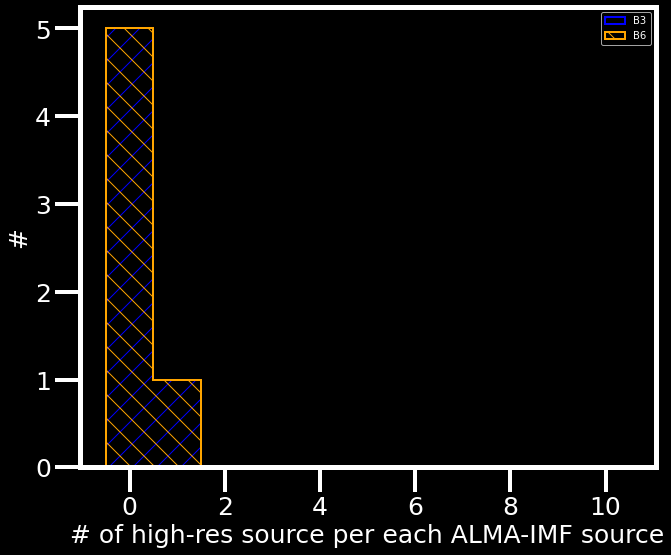

In [16]:

fitsdata = fits.open(w51n_b6_briggs)
b6highresimage = fitsdata[0].data[0][0]
hdrNBb6 = fits.getheader(w51n_b6_briggs)
wcsNBb6 = WCS(hdrNBb6,naxis=2)
xysky = np.vstack((sky_ra, sky_dec)).T
pixxy_b6 = wcsNBb6.wcs_world2pix(xysky,0)
def count_source_in_image(image, xpix, ypix, kind='center'):
    nsource = len(xpix)
    isinside = []
    if kind is 'center':
        for i in range(nsource):
            if xpix[i] > image.shape[0] or ypix[i] > image.shape[1]:
                continue
            if np.isfinite(image[int(xpix[i]),int(ypix[i])]):
                isinside.append(i)
    
    return isinside
ind_inside_b6image = count_source_in_image(b6highresimage, pixxy_b6[:,0], pixxy_b6[:,1])
    
hdrNBalmaimf = fits.getheader(w51n_b3_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  

fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])

fitsdata = fits.open(w51n_b3_tt0)
hdrNB = fits.getheader(w51n_b3_tt0)  
wcsNB = WCS(hdrNB,naxis=2)
xysource = wcsNB.wcs_world2pix(xysource_sky,0)
scaleNB = wcsNB.proj_plane_pixel_scales()[0]
scaleNB_phy = scaleNB * np.pi / 180 * 5.41e3 

#skylim1 = wcsNB.pixel_to_world(6500,6750)
#skylim2 = wcsNB.pixel_to_world(6500+0.35/scaleNB_phy.value,6750+0.2/scaleNB_phy.value)
#print('ho',skylim1)
#print(skylim1[0])
#limitarea = [float(skylim1),float(skylim1[1]),float(skylim2[0]),float(skylim2[1])]
nonzeroind = multiplicity(ax1,hdrNB,cat_w51n,xysource,isb3=True,beam=beamalmaimf,use_criteria=False, label=ind_inside_b6image
                          ,color='cyan',lw=2,legendlabel='B3',return_nonzero_ind=True)
print(nonzeroind)
hdrNBalmaimf = fits.getheader(w51n_b6_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  

nonzeroind = multiplicity(ax1,hdrNB,cat_w51n,xysource,isb3=False,beam=beamalmaimf,use_criteria=False
                          ,color='cyan',lw=2,hatch='\\',histcolor='orange',legendlabel='B6',label=ind_inside_b6image,return_nonzero_ind=True)
ax1.legend()
print(nonzeroind)


### w51n (sources inside FoV + recommneded criteria)

[[8253.         7015.        ]
 [8100.99999998 7129.        ]
 [7028.00000001 7167.00000001]
 [7628.00000001 7226.        ]
 [7826.00000001 7273.        ]
 [7763.99999999 7277.99999999]
 [7490.99999999 7286.        ]
 [7343.00000001 7299.        ]
 [7603.99999998 7294.        ]
 [7146.00000001 7318.99999999]
 [7185.00000002 7302.99999999]
 [7551.99999999 7306.99999999]
 [7082.99999999 7350.99999999]
 [7782.00000001 7330.99999999]
 [7183.00000001 7333.        ]
 [7046.99999998 7341.99999999]
 [7279.99999999 7350.99999999]
 [7047.00000001 7358.        ]
 [7008.00000002 7361.        ]
 [7272.         7367.        ]
 [7255.99999999 7409.        ]
 [7115.         7310.99999999]]
1 7148.8175383774305 7318.937180417698 124.94516775100712 112.33088203671852 106.02 4
2 7347.714058345279 7303.508605958352 117.47373917957684 108.68802489386054 114.18 1
5 7615.0171897367745 7262.8805780254 163.45945346530164 126.21659632243598 154.6 2
6 7259.791329436012 7371.7542787048105 126.08802489386453 119.1

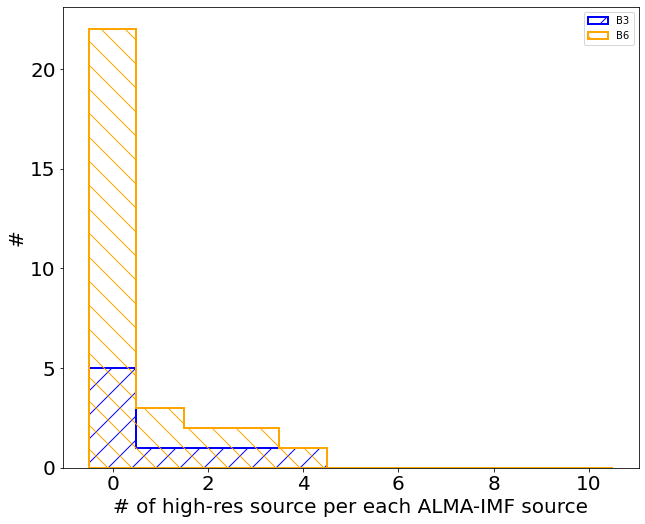

In [5]:
fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])
catalog = Table.read('../spectral_index/w51n_combined_catalog.fits',format='fits')
xysource = np.vstack((catalog['x_pix'],catalog['y_pix'])).T
fitsdata = fits.open(w51n_b3_tt0)
hdrNB = fits.getheader(w51n_b3_tt0)  
wcsNB = WCS(hdrNB,naxis=2)
scaleNB = wcsNB.proj_plane_pixel_scales()[0]
scaleNB_phy = scaleNB * np.pi / 180 * 5.41e3 
xysource = wcsNB.wcs_world2pix(xysource_sky,0)
#skylim1 = wcsNB.pixel_to_world(6500,6750)
#skylim2 = wcsNB.pixel_to_world(6500+0.35/scaleNB_phy.value,6750+0.2/scaleNB_phy.value)
#print('ho',skylim1)
#print(skylim1[0])
#limitarea = [float(skylim1),float(skylim1[1]),float(skylim2[0]),float(skylim2[1])]
nonzeroind = multiplicity(ax1,hdrNB,cat_w51n,xysource,isb3=True,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
                          ,color='cyan',lw=2,legendlabel='B3',return_nonzero_ind=True)
print(nonzeroind)
hdrNBalmaimf = fits.getheader(w51n_b6_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  

nonzeroind = multiplicity(ax1,hdrNB,cat_w51n,xysource,isb3=False,beam=beamalmaimf,use_criteria=True
                          ,color='cyan',lw=2,hatch='\\',histcolor='orange',legendlabel='B6',label=ind_inside_b6image,return_nonzero_ind=True)
ax1.legend()




### w51e (Fov)

[ 0  1  2  3  4  5  6  7  8  9 11 12 13 16 18 22 24 26 27 31 35]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 25
 27 28 29 30 32]
hoh 25
[[7566.00000001 5089.        ]
 [7602.99999999 5361.99999999]
 [7548.         5498.        ]
 [7487.99999999 5505.        ]
 [7514.00000001 5513.00000001]
 [7440.00000001 5647.        ]
 [7415.00000001 5901.        ]
 [7028.         5919.        ]
 [6873.00000001 5923.00000001]
 [7364.         5969.        ]
 [7074.         5979.        ]
 [7104.00000001 6040.        ]
 [7339.99999999 6048.00000001]
 [7390.         6081.        ]
 [6989.         6094.        ]
 [7356.         6100.00000001]
 [7325.00000001 6121.        ]
 [6995.99999999 6187.00000001]
 [7357.         6197.        ]
 [7285.99999999 6206.00000001]
 [7273.99999999 6235.        ]
 [7292.         6286.        ]
 [7310.00000001 6318.        ]
 [7253.         6325.99999999]
 [7264.00000001 6341.        ]
 [7311.00000001 6367.        ]
 [7712.         6918.        ]
 

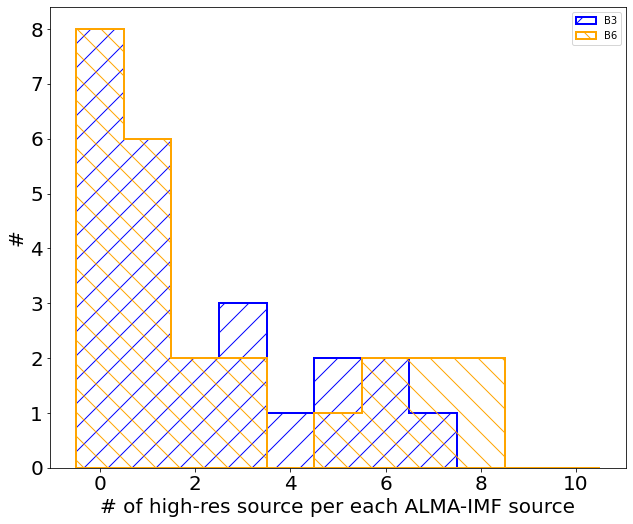

In [6]:
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['axes.titlesize']=20
catdata_w51n = ascii.read(cat_w51e,data_start=0,format='commented_header', header_start=120,  comment="!")
sky_ra = catdata_w51n['WCS_ACOOR']
sky_dec = catdata_w51n['WCS_DCOOR']
pix_x = catdata_w51n['XCO_P']
pix_y = catdata_w51n['YCO_P']

afwhm_b6 = catdata_w51n['AFWHM02']
bfwhm_b6 = catdata_w51n['BFWHM02']

asize_b6 = catdata_w51n['ASIZE02']
bsize_b6 = catdata_w51n['BSIZE02']

theta_b6 = catdata_w51n['THETA02']

afwhm_b3 = catdata_w51n['AFWHM03']
bfwhm_b3 = catdata_w51n['BFWHM03']

asize_b3 = catdata_w51n['ASIZE03']
bsize_b3 = catdata_w51n['BSIZE03']

theta_b3 = catdata_w51n['THETA03']

no = catdata_w51n['NO']

rec_ind_b3 = np.where((np.abs(catdata_w51n['GOODM03'])>1)&
                   (np.abs(catdata_w51n['SIGNM03'])>1)&
                   (catdata_w51n['FXP_BST03']/catdata_w51n['FXP_ERR03']>2)&
                   (catdata_w51n['FXT_BST03']/catdata_w51n['FXT_ERR03']>2)&
                   (catdata_w51n['AFWHM03']/catdata_w51n['BFWHM03']<2)&
                   (catdata_w51n['FOOA03']/catdata_w51n['AFWHM03']>1.15))[0]

rec_ind_b6 = np.where((np.abs(catdata_w51n['GOODM02'])>1)&
                   (np.abs(catdata_w51n['SIGNM02'])>1)&
                   (catdata_w51n['FXP_BST02']/catdata_w51n['FXP_ERR02']>2)&
                   (catdata_w51n['FXT_BST02']/catdata_w51n['FXT_ERR02']>2)&
                   (catdata_w51n['AFWHM02']/catdata_w51n['BFWHM02']<2)&
                   (catdata_w51n['FOOA02']/catdata_w51n['AFWHM02']>1.15))[0]
print(rec_ind_b3)
print(rec_ind_b6)



skypos = np.vstack((sky_ra,sky_dec)).T


manualindex =[1,6,3,5,8,68]
manualindex =[0,5,2,4,7,67]
catalogdir = '/orange/adamginsburg/ALMA_IMF/catalogs/getsf-smoothed/'
cat_w51e = catalogdir + 'W51-E-getsf.cat'
cat_w51n = catalogdir + 'W51-IRS2-getsf.cat'

fitsdata = fits.open(w51e2_b6_briggs)
b6highresimage = fitsdata[0].data[0][0]
hdrNBb6 = fits.getheader(w51e2_b6_briggs)
wcsNBb6 = WCS(hdrNBb6,naxis=2)
xysky = np.vstack((sky_ra, sky_dec)).T
pixxy_b6 = wcsNBb6.wcs_world2pix(xysky,0)

ind_inside_b6image = count_source_in_image(b6highresimage, pixxy_b6[:,0], pixxy_b6[:,1])
print('hoh',len(ind_inside_b6image))
hdrNBalmaimf = fits.getheader(w51e_b3_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  

fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])
catalog = Table.read('../spectral_index/w51e_combined_catalog.fits',format='fits')
xysource_sky = np.vstack((catalog['x_sky'],catalog['y_sky'])).T

fitsdata = fits.open(w51e2_b3_tt0)
hdrNB = fits.getheader(w51e2_b3_tt0)  
wcsNB = WCS(hdrNB,naxis=2)
scaleNB = wcsNB.proj_plane_pixel_scales()[0]
scaleNB_phy = scaleNB * np.pi / 180 * 5.41e3 
xysource = wcsNB.wcs_world2pix(xysource_sky,0)

#skylim1 = wcsNB.pixel_to_world(6500,6750)
#skylim2 = wcsNB.pixel_to_world(6500+0.35/scaleNB_phy.value,6750+0.2/scaleNB_phy.value)
#print('ho',skylim1)
#print(skylim1[0])
#limitarea = [float(skylim1),float(skylim1[1]),float(skylim2[0]),float(skylim2[1])]
ind = multiplicity(ax1,hdrNB,cat_w51e,xysource,isb3=True,beam=beamalmaimf,use_criteria=False, label=ind_inside_b6image
                          ,color='cyan',lw=2,legendlabel='B3',return_nonzero_ind=True)
print(ind)
hdrNBalmaimf = fits.getheader(w51n_b6_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  

ind = multiplicity(ax1,hdrNB,cat_w51e,xysource,isb3=False,beam=beamalmaimf,use_criteria=False
                          ,color='cyan',lw=2,hatch='\\',histcolor='orange',legendlabel='B6',label=ind_inside_b6image,return_nonzero_ind=True)
ax1.legend()
print(ind)

### w51e (FoV + recommended criteria)

[[7566 5089]
 [7603 5362]
 [7548 5498]
 [7488 5505]
 [7514 5513]
 [7440 5647]
 [7415 5901]
 [7028 5919]
 [6873 5923]
 [7364 5969]
 [7074 5979]
 [7104 6040]
 [7340 6048]
 [7390 6081]
 [6989 6094]
 [7356 6100]
 [7325 6121]
 [6996 6187]
 [7357 6197]
 [7286 6206]
 [7274 6235]
 [7292 6286]
 [7310 6318]
 [7253 6326]
 [7264 6341]
 [7311 6367]
 [7712 6918]
 [7079 7041]
 [6788 7074]
 [6901 7094]
 [7151 7197]
 [7241 7250]
 [7258 7224]
 [7136 7235]
 [7273 7235]
 [7120 7251]
 [7195 7320]
 [7079 7347]
 [8009 7395]
 [7310 7398]
 [7961 7408]
 [7318 7451]
 [8132 7446]
 [7339 7449]
 [7193 7473]
 [7430 7488]
 [7312 7497]
 [7202 7505]
 [7403 7513]
 [7200 7525]
 [7270 7527]
 [7216 7537]
 [7227 7541]
 [7271 7614]
 [7213 7652]
 [7369 8081]
 [7501 5114]
 [7543 5116]
 [7496 5137]
 [7562 5204]
 [7426 5328]
 [7436 5358]
 [7423 5371]
 [8088 5425]
 [7423 5649]
 [7406 5837]
 [7427 5915]
 [7018 5929]
 [7369 6092]
 [7258 6273]
 [7253 6309]
 [7246 6507]
 [7571 6623]
 [6969 6851]
 [7004 6920]
 [7168 7183]
 [7292 7189]

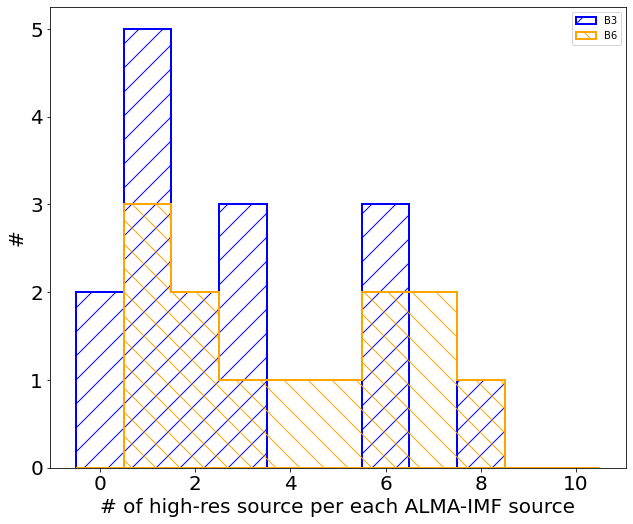

In [7]:
fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])
catalog = Table.read('../spectral_index/w51e_combined_catalog.fits',format='fits')
xysource = np.vstack((catalog['x_pix'],catalog['y_pix'])).T
fitsdata = fits.open(w51e2_b3_tt0)
hdrNB = fits.getheader(w51e2_b3_tt0)  
wcsNB = WCS(hdrNB,naxis=2)
scaleNB = wcsNB.proj_plane_pixel_scales()[0]
scaleNB_phy = scaleNB * np.pi / 180 * 5.41e3 

#skylim1 = wcsNB.pixel_to_world(6500,6750)
#skylim2 = wcsNB.pixel_to_world(6500+0.35/scaleNB_phy.value,6750+0.2/scaleNB_phy.value)
#print('ho',skylim1)
#print(skylim1[0])
#limitarea = [float(skylim1),float(skylim1[1]),float(skylim2[0]),float(skylim2[1])]
ind = multiplicity(ax1,hdrNB,cat_w51e,xysource,isb3=True,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
                          ,color='cyan',lw=2,legendlabel='B3',return_nonzero_ind=True)
print(ind)
hdrNBalmaimf = fits.getheader(w51n_b6_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  

ind = multiplicity(ax1,hdrNB,cat_w51e,xysource,isb3=False,beam=beamalmaimf,use_criteria=True
                          ,color='cyan',lw=2,hatch='\\',histcolor='orange',legendlabel='B6',label=ind_inside_b6image,return_nonzero_ind=True)
ax1.legend()
print(ind)

[[6442.39993032 2974.6000072 ]
 [6494.19993029 3356.80000719]
 [6417.1999303  3547.20000718]
 [6333.19993029 3557.00000719]
 [6369.59993032 3568.20000721]
 [6265.99993031 3755.80000719]
 [6230.99993032 4111.4000072 ]
 [5689.1999303  4136.6000072 ]
 [5472.19993032 4142.2000072 ]
 [6159.5999303  4206.6000072 ]
 [5753.59993031 4220.60000719]
 [5795.59993032 4306.0000072 ]
 [6125.99993029 4317.2000072 ]
 [6195.9999303  4363.40000719]
 [5634.59993031 4381.60000719]
 [6148.39993031 4390.0000072 ]
 [6104.99993032 4419.4000072 ]
 [5644.3999303  4511.80000721]
 [6149.7999303  4525.80000719]
 [6050.3999303  4538.40000719]
 [6033.59993029 4579.00000718]
 [6058.7999303  4650.40000719]
 [6083.99993031 4695.20000719]
 [6004.19993031 4706.40000718]
 [6019.59993032 4727.40000719]
 [6085.39993031 4763.8000072 ]
 [6646.7999303  5535.20000719]
 [5760.59993031 5707.4000072 ]
 [5353.19993031 5753.6000072 ]
 [5511.39993031 5781.60000719]
 [5861.3999303  5925.8000072 ]
 [5987.39993031 6000.00000719]
 [6011.1

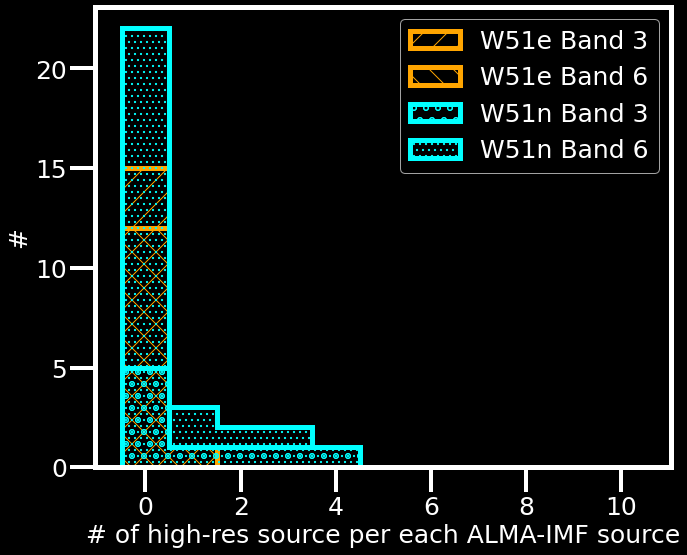

In [21]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['axes.labelsize']=25
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.rcParams['axes.titlesize']=25
plt.style.use('dark_background')
mpl.rcParams['xtick.major.size'] = 25
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 15
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 25
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 15
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['axes.linewidth']=5

class catdata():
    def __init__(self,catfile,band='B3'):
        catdata_w51e = ascii.read(catfile,data_start=0,format='commented_header', header_start=120,  comment="!")
        self.sky_ra = catdata_w51e['WCS_ACOOR']
        self.sky_dec = catdata_w51e['WCS_DCOOR']
        self.pix_x = catdata_w51e['XCO_P']
        self.pix_y = catdata_w51e['YCO_P']
        
        if band=='B3':
            bandind = 3
        else:
            bandind = 2

        self.afwhm = catdata_w51e['AFWHM0%d'%bandind]
        self.bfwhm = catdata_w51e['BFWHM0%d'%bandind]

        self.asize = catdata_w51e['ASIZE0%d'%bandind]
        self.bsize = catdata_w51e['BSIZE0%d'%bandind]

        self.theta = catdata_w51e['THETA0%d'%bandind]
        
        self.flux = catdata_w51e['FXT_BST0%d'%bandind]
        self.fluxerr = catdata_w51e['FXT_ERR0%d'%bandind]
        self.flux_g = catdata_w51e['FXT_ALT0%d'%bandind]
        self.fooa = catdata_w51e['FOOA0%d'%bandind]
        self.foob = catdata_w51e['FOOB0%d'%bandind]
        

        self.no = catdata_w51e['NO']

        self.rec_ind_b3 = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15))[0]

        self.rec_ind_b6 = np.where((np.abs(catdata_w51e['GOODM02'])>1)&
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]
        self.rec_ind = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15) &
                           (np.abs(catdata_w51e['GOODM02'])>1) &
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]
        
fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])
catalog = Table.read('../spectral_index/w51e_combined_catalog.fits',format='fits')

xysky = np.vstack((catalog['x_sky'],catalog['y_sky'])).T

fitsdata = fits.open(w51e2_b3_tt0)
hdrNB = fits.getheader(w51e2_b3_tt0)  
wcsNB = WCS(hdrNB,naxis=2)
scaleNB = wcsNB.proj_plane_pixel_scales()[0]
scaleNB_phy = scaleNB * np.pi / 180 * 5.41e3 


fitsdata = fits.open(w51e2_b6_briggs)
b6highresimage = fitsdata[0].data[0][0]
hdrNBb6 = fits.getheader(w51e2_b6_briggs)
wcsNBb6 = WCS(hdrNBb6,naxis=2)
xysource = wcsNBb6.wcs_world2pix(xysky,0)

almaimfcatalog = catdata(cat_w51e)
xysky = np.vstack((almaimfcatalog.sky_ra, almaimfcatalog.sky_dec)).T
pixxy_b6 = wcsNBb6.wcs_world2pix(xysky,0)
ind_inside_b6image = count_source_in_image(b6highresimage, pixxy_b6[:,0], pixxy_b6[:,1])

ind = multiplicity(ax1,hdrNB,cat_w51e,xysource,isb3=True,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
                          ,histcolor='orange',lw=5,legendlabel='W51e Band 3',return_nonzero_ind=True)

ind = multiplicity(ax1,hdrNB,cat_w51e,xysource,isb3=False,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
                          ,histcolor='orange',lw=5,legendlabel='W51e Band 6',return_nonzero_ind=True,hatch='\\')



catalog = Table.read('../spectral_index/w51n_combined_catalog.fits',format='fits')
xysource = np.vstack((catalog['x_pix'],catalog['y_pix'])).T
fitsdata = fits.open(w51n_b3_tt0)
hdrNB = fits.getheader(w51n_b3_tt0)  
wcsNB = WCS(hdrNB,naxis=2)
scaleNB = wcsNB.proj_plane_pixel_scales()[0]
scaleNB_phy = scaleNB * np.pi / 180 * 5.41e3 


fitsdata = fits.open(w51n_b6_briggs)
b6highresimage = fitsdata[0].data[0][0]
hdrNBb6 = fits.getheader(w51n_b6_briggs)
wcsNBb6 = WCS(hdrNBb6,naxis=2)

almaimfcatalog = catdata(cat_w51n)
xysky = np.vstack((almaimfcatalog.sky_ra, almaimfcatalog.sky_dec)).T
pixxy_b6 = wcsNBb6.wcs_world2pix(xysky,0)
ind_inside_b6image = count_source_in_image(b6highresimage, pixxy_b6[:,0], pixxy_b6[:,1])



ind = multiplicity(ax1,hdrNB,cat_w51n,xysource,isb3=True,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
                         ,lw=5,legendlabel='W51n Band 3',return_nonzero_ind=True, histcolor='cyan',hatch='o')

ind = multiplicity(ax1,hdrNB,cat_w51n,xysource,isb3=False,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
                          ,lw=5,legendlabel='W51n Band 6',return_nonzero_ind=True,histcolor='cyan',hatch='..')

plt.legend(fontsize=25)


[[6442.39993032 2974.6000072 ]
 [6494.19993029 3356.80000719]
 [6417.1999303  3547.20000718]
 [6333.19993029 3557.00000719]
 [6369.59993032 3568.20000721]
 [6265.99993031 3755.80000719]
 [6230.99993032 4111.4000072 ]
 [5689.1999303  4136.6000072 ]
 [5472.19993032 4142.2000072 ]
 [6159.5999303  4206.6000072 ]
 [5753.59993031 4220.60000719]
 [5795.59993032 4306.0000072 ]
 [6125.99993029 4317.2000072 ]
 [6195.9999303  4363.40000719]
 [5634.59993031 4381.60000719]
 [6148.39993031 4390.0000072 ]
 [6104.99993032 4419.4000072 ]
 [5644.3999303  4511.80000721]
 [6149.7999303  4525.80000719]
 [6050.3999303  4538.40000719]
 [6033.59993029 4579.00000718]
 [6058.7999303  4650.40000719]
 [6083.99993031 4695.20000719]
 [6004.19993031 4706.40000718]
 [6019.59993032 4727.40000719]
 [6085.39993031 4763.8000072 ]
 [6646.7999303  5535.20000719]
 [5760.59993031 5707.4000072 ]
 [5353.19993031 5753.6000072 ]
 [5511.39993031 5781.60000719]
 [5861.3999303  5925.8000072 ]
 [5987.39993031 6000.00000719]
 [6011.1

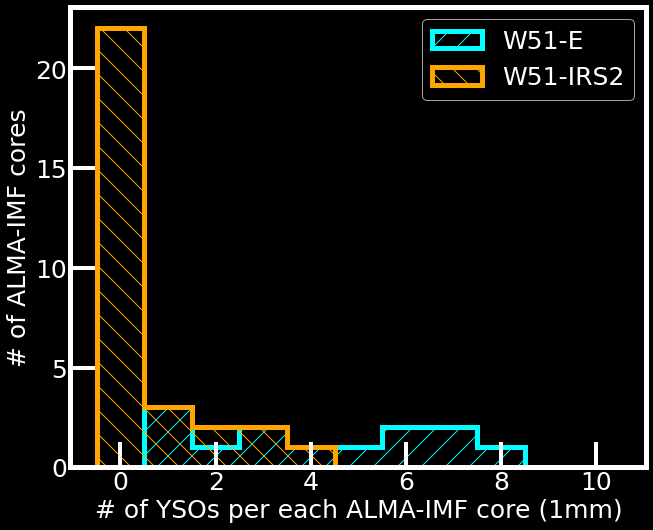

In [30]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['axes.labelsize']=25
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.rcParams['axes.titlesize']=25
plt.style.use('dark_background')
mpl.rcParams['xtick.major.size'] = 25
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 15
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 25
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 15
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['axes.linewidth']=5

class catdata():
    def __init__(self,catfile,band='B3'):
        catdata_w51e = ascii.read(catfile,data_start=0,format='commented_header', header_start=120,  comment="!")
        self.sky_ra = catdata_w51e['WCS_ACOOR']
        self.sky_dec = catdata_w51e['WCS_DCOOR']
        self.pix_x = catdata_w51e['XCO_P']
        self.pix_y = catdata_w51e['YCO_P']
        
        if band=='B3':
            bandind = 3
        else:
            bandind = 2

        self.afwhm = catdata_w51e['AFWHM0%d'%bandind]
        self.bfwhm = catdata_w51e['BFWHM0%d'%bandind]

        self.asize = catdata_w51e['ASIZE0%d'%bandind]
        self.bsize = catdata_w51e['BSIZE0%d'%bandind]

        self.theta = catdata_w51e['THETA0%d'%bandind]
        
        self.flux = catdata_w51e['FXT_BST0%d'%bandind]
        self.fluxerr = catdata_w51e['FXT_ERR0%d'%bandind]
        self.flux_g = catdata_w51e['FXT_ALT0%d'%bandind]
        self.fooa = catdata_w51e['FOOA0%d'%bandind]
        self.foob = catdata_w51e['FOOB0%d'%bandind]
        

        self.no = catdata_w51e['NO']

        self.rec_ind_b3 = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15))[0]

        self.rec_ind_b6 = np.where((np.abs(catdata_w51e['GOODM02'])>1)&
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]
        self.rec_ind = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15) &
                           (np.abs(catdata_w51e['GOODM02'])>1) &
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]
        
fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])
catalog = Table.read('../spectral_index/w51e_combined_catalog.fits',format='fits')
xysky = np.vstack((catalog['x_sky'],catalog['y_sky'])).T
fitsdata = fits.open(w51e2_b3_tt0)
hdrNB = fits.getheader(w51e2_b3_tt0)  
wcsNB = WCS(hdrNB,naxis=2)
scaleNB = wcsNB.proj_plane_pixel_scales()[0]
scaleNB_phy = scaleNB * np.pi / 180 * 5.41e3 


fitsdata = fits.open(w51e2_b6_briggs)
b6highresimage = fitsdata[0].data[0][0]
hdrNBb6 = fits.getheader(w51e2_b6_briggs)
wcsNBb6 = WCS(hdrNBb6,naxis=2)
xysource = wcsNBb6.wcs_world2pix(xysky,0)

almaimfcatalog = catdata(cat_w51e)
xysky = np.vstack((almaimfcatalog.sky_ra, almaimfcatalog.sky_dec)).T
pixxy_b6 = wcsNBb6.wcs_world2pix(xysky,0)
ind_inside_b6image = count_source_in_image(b6highresimage, pixxy_b6[:,0], pixxy_b6[:,1])

#ind = multiplicity(ax1,hdrNB,cat_w51e,xysource,isb3=True,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
#                          ,histcolor='orange',lw=5,legendlabel='W51e Band 3',return_nonzero_ind=True)
hdrNBalmaimf = fits.getheader(w51e_b6_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  


ind = multiplicity(ax1,hdrNBb6,cat_w51e,xysource,isb3=False,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
                          ,histcolor='cyan',lw=5,legendlabel='W51-E',return_nonzero_ind=True)

print('hoho',len(ind[2]),len(catalog['x_sky']))

catalog = Table.read('../spectral_index/w51n_combined_catalog.fits',format='fits')
xysky = np.vstack((catalog['x_sky'],catalog['y_sky'])).T
fitsdata = fits.open(w51n_b3_tt0)
hdrNB = fits.getheader(w51n_b3_tt0)  
wcsNB = WCS(hdrNB,naxis=2)
scaleNB = wcsNB.proj_plane_pixel_scales()[0]
scaleNB_phy = scaleNB * np.pi / 180 * 5.41e3 


fitsdata = fits.open(w51n_b6_briggs)
b6highresimage = fitsdata[0].data[0][0]
hdrNBb6 = fits.getheader(w51n_b6_briggs)
wcsNBb6 = WCS(hdrNBb6,naxis=2)
xysource = wcsNBb6.wcs_world2pix(xysky,0)

almaimfcatalog = catdata(cat_w51n)
xysky = np.vstack((almaimfcatalog.sky_ra, almaimfcatalog.sky_dec)).T
pixxy_b6 = wcsNBb6.wcs_world2pix(xysky,0)
ind_inside_b6image = count_source_in_image(b6highresimage, pixxy_b6[:,0], pixxy_b6[:,1])

hdrNBalmaimf = fits.getheader(w51n_b6_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  


#ind = multiplicity(ax1,hdrNB,cat_w51n,xysource,isb3=True,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
#                         ,lw=5,legendlabel='W51n Band 3',return_nonzero_ind=True, histcolor='cyan',hatch='o')

ind = multiplicity(ax1,hdrNBb6,cat_w51n,xysource,isb3=False,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
                          ,lw=5,legendlabel='W51-IRS2',return_nonzero_ind=True,histcolor='orange',hatch='\\')
print('hoho',len(ind[2]),len(catalog['x_sky']))

ax1.set_xlabel('# of YSOs per each ALMA-IMF core (1mm)')
ax1.set_ylabel('# of ALMA-IMF cores')
ax1.tick_params(axis="y",direction='in')
ax1.tick_params(axis="x",direction='in')
plt.legend(fontsize=25)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 8640: invalid start byte

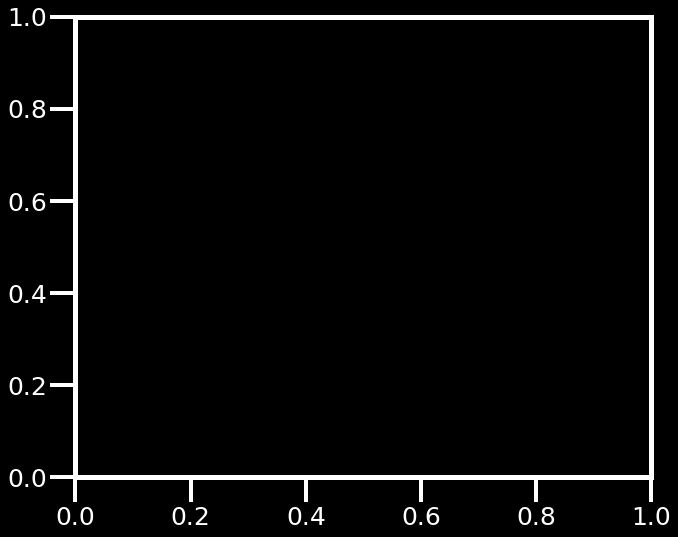

In [10]:
fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])

multiplicity(ax1,w51n_b3_almaimf, w51n_b3_tt0,catdata_w51n, '/home/t.yoo/w51/catalogue/alpha/w51n_combined_catalog.fits' )




In [ ]:


    
fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])

multiplicity(ax1,w51n_b3_almaimf, w51n_b3_tt0,catdata_w51n, '/home/t.yoo/w51/catalogue/alpha/w51n_b3_catalog.fits',band='B3' )


In [ ]:
### w51 b6 (b6 detections only)

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])

multiplicity(ax1,w51n_b6_almaimf, w51n_b6_briggs,catdata_w51n, '/home/t.yoo/w51/catalogue/alpha/w51n_b6_catalog.fits',band='B6')
             




In [ ]:
fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])

multiplicity(ax1,w51n_b6_almaimf, w51n_b6_briggs,catdata_w51n, '/home/t.yoo/w51/catalogue/alpha/w51n_combined_catalog.fits')
             
